In [1]:
import tarfile
import h5py
import pandas as pd
import os

In [2]:
# Unzipped MSD subset
tar = tarfile.open("millionsongsubset.tar.gz")
tar_members = tar.getmembers()

# Print the names of the files in the archive
for member in tar_members:
    print(member.name)

tar.close()

MillionSongSubset
MillionSongSubset/B
MillionSongSubset/B/G
MillionSongSubset/B/G/M
MillionSongSubset/B/G/M/TRBGMWQ12903CC23CD.h5
MillionSongSubset/B/G/M/TRBGMJF128F425E8EA.h5
MillionSongSubset/B/G/M/TRBGMOG128F92D75BD.h5
MillionSongSubset/B/G/M/TRBGMXY128F92FC2B2.h5
MillionSongSubset/B/G/M/TRBGMAW128F4231326.h5
MillionSongSubset/B/G/M/TRBGMJB128F92E5936.h5
MillionSongSubset/B/G/M/TRBGMMC12903CEFD3C.h5
MillionSongSubset/B/G/M/TRBGMNM128F932D140.h5
MillionSongSubset/B/G/M/TRBGMWD12903D0F674.h5
MillionSongSubset/B/G/M/TRBGMJD128F4266852.h5
MillionSongSubset/B/G/M/TRBGMZJ128F4264AA6.h5
MillionSongSubset/B/G/M/TRBGMHU128EF356CB8.h5
MillionSongSubset/B/G/M/TRBGMUA128F92E9A1C.h5
MillionSongSubset/B/G/M/TRBGMKO128F933A55B.h5
MillionSongSubset/B/G/M/TRBGMAZ12903CC3707.h5
MillionSongSubset/B/G/M/TRBGMIX128F9303ED6.h5
MillionSongSubset/B/G/W
MillionSongSubset/B/G/W/TRBGWSR128F4286574.h5
MillionSongSubset/B/G/W/TRBGWRL128F9301CB9.h5
MillionSongSubset/B/G/W/TRBGWQG128F92FB42D.h5
MillionSongSubset/

In [3]:
# Exploring MSD subset
filename = "MillionSongSubset/B/G/M/TRBGMWQ12903CC23CD.h5"

with h5py.File(filename, "r") as f:
    # Access the data using the keys
    print(f.keys())
    # Access the metadata for the song
    metadata = f["metadata"]
    print(metadata.keys())
    # Access the audio data
    analysis = f["analysis"]
    print(analysis.keys())
    # Access to musicbrainz
    musicbrainz = f["musicbrainz"]
    print(musicbrainz.keys())
    

<KeysViewHDF5 ['analysis', 'metadata', 'musicbrainz']>
<KeysViewHDF5 ['artist_terms', 'artist_terms_freq', 'artist_terms_weight', 'similar_artists', 'songs']>
<KeysViewHDF5 ['bars_confidence', 'bars_start', 'beats_confidence', 'beats_start', 'sections_confidence', 'sections_start', 'segments_confidence', 'segments_loudness_max', 'segments_loudness_max_time', 'segments_loudness_start', 'segments_pitches', 'segments_start', 'segments_timbre', 'songs', 'tatums_confidence', 'tatums_start']>
<KeysViewHDF5 ['artist_mbtags', 'artist_mbtags_count', 'songs']>


In [5]:
# ["musicbrainz"]["songs"]
# year when this song was released, according to musicbrainz.org
filename = "MillionSongSubset/B/G/F/TRBGFUW12903CA0E6B.h5"

# Open the HDF5 file using h5py
with h5py.File(filename, "r") as f:
    # Read data into a pandas DataFrame
    df = pd.DataFrame(f["musicbrainz"]["songs"][:])

# Print the first 5 rows of the DataFrame
display(df.head())

,idx_artist_mbtags,year
0,0,1982


In [91]:
# ["metadata"]["artist_terms"]
# artist_terms are tags provided by Echo Nest also are the ones provided by  musicbrainz
filename = "MillionSongSubset/B/G/K/TRBGKHZ128F931C32E.h5"

# Open the HDF5 file using h5py
with h5py.File(filename, "r") as f:
    # Read data into a pandas DataFrame
    df = pd.DataFrame(f["metadata"]["artist_terms"][:])
    df1 = pd.DataFrame(f["metadata"]["artist_terms_freq"][:])
    df2 = pd.DataFrame(f["metadata"]["artist_terms_weight"][:])
    df3 = pd.DataFrame(f["metadata"]["similar_artists"][:])

# Print the first 5 rows of the DataFrame
print(f"artist_terms")
print(df.head())
print(f"artist_terms_freq")
print(df1.head())
print(f"artist_terms_weight")
print(df2.head())
print(f"similar_artists")
print(df3.head())

artist_terms
              0
0    b'dubstep'
1      b'grime'
2  b'uk garage'
3        b'dub'
4   b'trip hop'
artist_terms_freq
          0
0  1.000000
1  0.926206
2  0.848361
3  0.937128
4  0.799247
artist_terms_weight
          0
0  1.000000
1  0.945460
2  0.886700
3  0.868279
4  0.827266
similar_artists
                       0
0  b'ARXPPPB1187FB507B6'
1  b'ARYCLIU1187FB3614B'
2  b'ARFELYQ1187FB5830C'
3  b'ARX0HHD1187B98F304'
4  b'ARYEWDN1187FB507BC'


In [97]:
# Exploring ["metadata"]["songs"]
# Several features per song from metadata

filename = "MillionSongSubset/B/H/S/TRBHSVR128F9324499.h5"

# Open the HDF5 file using h5py
with h5py.File(filename, "r") as f:
    # Read data into a pandas DataFrame
    df = pd.DataFrame(f["metadata"]["songs"][:])

# Print the first 5 rows of the DataFrame
print(df.dtypes)
display(df)

analyzer_version        object
artist_7digitalid        int32
artist_familiarity     float64
artist_hotttnesss      float64
artist_id               object
artist_latitude        float64
artist_location         object
artist_longitude       float64
artist_mbid             object
artist_name             object
artist_playmeid          int32
genre                   object
idx_artist_terms         int32
idx_similar_artists      int32
release                 object
release_7digitalid       int32
song_hotttnesss        float64
song_id                 object
title                   object
track_7digitalid         int32
dtype: object


,analyzer_version,artist_7digitalid,artist_familiarity,artist_hotttnesss,artist_id,artist_latitude,artist_location,artist_longitude,artist_mbid,artist_name,artist_playmeid,genre,idx_artist_terms,idx_similar_artists,release,release_7digitalid,song_hotttnesss,song_id,title,track_7digitalid
0,b'',-1,0.291674,0.4472,b'ARXUCPO12086C169A4',NaN,b'',NaN,b'334d914a-b3a8-4b97-ab1c-f6258116881f',b'Frank Sinatra',-1,b'',0,0,b'Francis Albert Sinatra & Antonio Carlos Jobim',360271,NaN,b'SOXRFSL12A58A78723',b'Quiet Nights Of Quiet Stars [Corcovado] [The...,4014427


In [12]:
# ["analysis"]
# Features from analysis
filename = "MillionSongSubset/B/G/K/TRBGKHZ128F931C32E.h5"

# Open the HDF5 file using h5py
with h5py.File(filename, "r") as f:
    # Read data into a pandas DataFrame
    df = pd.DataFrame(f["analysis"]['bars_confidence'][:])
    df1 = pd.DataFrame(f["analysis"]['bars_start'][:])
    df2 = pd.DataFrame(f["analysis"]['beats_confidence'][:])
    df3 = pd.DataFrame(f["analysis"]['beats_start'][:])
    df4 = pd.DataFrame(f["analysis"]['sections_confidence'][:])
    df5 = pd.DataFrame(f["analysis"]['sections_start'][:])
    df6 = pd.DataFrame(f["analysis"]['segments_confidence'][:])
    df7 = pd.DataFrame(f["analysis"]['segments_loudness_max'][:])
    df8 = pd.DataFrame(f["analysis"]['segments_loudness_max_time'][:])
    df9 = pd.DataFrame(f["analysis"]['segments_loudness_start'][:])
    df10 = pd.DataFrame(f["analysis"]['segments_pitches'][:])
    df11 = pd.DataFrame(f["analysis"]['segments_start'][:])
    df12 = pd.DataFrame(f["analysis"]['segments_timbre'][:])
    df13 = pd.DataFrame(f["analysis"]['tatums_confidence'][:])
    df14 = pd.DataFrame(f["analysis"]['tatums_start'][:])

# Print the first 5 rows of the DataFrame
print(f"Number of rows bars_confidence", df.count())
print(df.head(2))
print(f"Number of rows bars_start", df1.count())
print(df1.head(2))
print(f"Number of rows beats_confidence", df2.count())
print(df2.head(2))
print(f"Number of rows beats_start", df3.count())
print(df3.head(2))
print(f"Number of rows sections_confidence", df4.count())
print(df4.head(2))
print(f"Number of rows sections_start", df5.count())
print(df5.head(2))
print(f"Number of rows segments_confidence", df6.count())
print(df6.head(2))
print(f"Number of rows segments_loudness_max", df7.count())
print(df7.head(2))
print(f"Number of rows segments_loudness_max_time", df8.count())
print(df8.head(2))
print(f"Number of rows segments_loudness_max_start", df9.count())
print(df9.head(2))
print(f"Number of rows segments_pitches", df10.count())
print(df10.head(2))
print(f"Number of rows segments_start", df11.count())
print(df11.head(2))
print(f"Number of rows segments_timbre", df12.count())
print(df12.head(2))
print(f"Number of rows tatums_confidence", df13.count())
print(df13.head(2))
print(f"Number of rows tatums_start", df14.count())
print(df14.head(2))

Number of rows bars_confidence 0    176
dtype: int64
       0
0  0.071
1  0.059
Number of rows bars_start 0    176
dtype: int64
         0
0  0.86559
1  2.43317
Number of rows beats_confidence 0    708
dtype: int64
       0
0  0.444
1  0.468
Number of rows beats_start 0    708
dtype: int64
         0
0  0.43995
1  0.86559
Number of rows sections_confidence 0    16
dtype: int64
       0
0  1.000
1  0.746
Number of rows sections_start 0    16
dtype: int64
          0
0   0.00000
1  27.51113
Number of rows segments_confidence 0    1085
dtype: int64
       0
0  1.000
1  0.778
Number of rows segments_loudness_max 0    1085
dtype: int64
        0
0 -16.030
1 -19.488
Number of rows segments_loudness_max_time 0    1085
dtype: int64
         0
0  0.10190
1  0.01441
Number of rows segments_loudness_max_start 0    1085
dtype: int64
        0
0 -60.000
1 -29.087
Number of rows segments_pitches 0     1085
1     1085
2     1085
3     1085
4     1085
5     1085
6     1085
7     1085
8     1085
9     

In [15]:
# ["analysis"]["songs"]
# Several features per song from analysis
filename = "MillionSongSubset/B/G/K/TRBGKHZ128F931C32E.h5"

# Open the HDF5 file using h5py
with h5py.File(filename, "r") as f:
    # Read data into a pandas DataFrame
    df = pd.DataFrame(f["analysis"]["songs"][:])

# Print the first 5 rows of the DataFrame
print(df[["analysis_sample_rate", "danceability", "duration", "end_of_fade_in", "energy", "key"]])
print(df[["key_confidence", "loudness", "mode", "mode_confidence", "start_of_fade_out"]])
print(df[["tempo", "time_signature", "time_signature_confidence", "track_id"]])
print(f"Column names")
print(df.dtypes)

   analysis_sample_rate  danceability   duration  end_of_fade_in  energy  key
0                 22050           0.0  299.49342             0.0     0.0   11
   key_confidence  loudness  mode  mode_confidence  start_of_fade_out
0           0.913    -6.304     0            0.704            294.568
    tempo  time_signature  time_signature_confidence               track_id
0  143.01               4                      0.798  b'TRBGKHZ128F931C32E'
Column names
analysis_sample_rate                int32
audio_md5                          object
danceability                      float64
duration                          float64
end_of_fade_in                    float64
energy                            float64
idx_bars_confidence                 int32
idx_bars_start                      int32
idx_beats_confidence                int32
idx_beats_start                     int32
idx_sections_confidence             int32
idx_sections_start                  int32
idx_segments_confidence            

### Analize what are the differences btw these features coming from "Analysis" and ["analysis"]["songs"]

In [9]:
import os

### USE THIS TO CREATE A DF FROM A FEW FILES BEFORE CREATING THE LARGE DATAFRAME FROM ALL 10000 FILES 

In [99]:
# FOR ["metadata"]["songs"]
# List of the actual file paths
path_to_files = "MillionSongSubset/B/G/K/"
list_of_filenames = [os.path.join(path_to_files, f) for f in os.listdir(path_to_files) if f.endswith(".h5")]

# Create an empty DataFrame to store the data
data =[]

# Loop over the HDF5 files
for filename in list_of_filenames:
    with h5py.File(filename, "r") as f:
        # Get the metadata from the HDF5 file
        idx_bars_confidence = f["analysis"]["songs"][0]["idx_bars_confidence"]
        idx_bars_start = f["analysis"]["songs"][0]["idx_bars_start"]
        idx_beats_confidence = f["analysis"]["songs"][0]["idx_beats_confidence"]
        idx_beats_start = f["analysis"]["songs"][0]["idx_beats_start"]
        idx_sections_confidence = f["analysis"]["songs"][0]["idx_sections_confidence"]
        idx_sections_start = f["analysis"]["songs"][0]["idx_sections_start"]
        idx_segments_confidence = f["analysis"]["songs"][0]["idx_segments_confidence"]
        idx_segments_loudness_max = f["analysis"]["songs"][0]["idx_segments_loudness_max"]
        idx_segments_loudness_max_time = f["analysis"]["songs"][0]["idx_segments_loudness_max_time"]
        idx_segments_loudness_start = f["analysis"]["songs"][0]["idx_segments_loudness_start"]
        idx_segments_pitches = f["analysis"]["songs"][0]["idx_segments_pitches"]
        idx_segments_start = f["analysis"]["songs"][0]["idx_segments_start"]
        idx_segments_timbre = f["analysis"]["songs"][0]["idx_segments_timbre"]
        idx_tatums_confidence = f["analysis"]["songs"][0]["idx_tatums_confidence"]
        idx_tatums_start = f["analysis"]["songs"][0]["idx_tatums_start"]
        song_id = f["metadata"]["songs"][0]["song_id"]
        artist_name = f["metadata"]["songs"][0]["artist_name"]
        genre = f["metadata"]["songs"][0]["genre"]
        title = f["metadata"]["songs"][0]["title"]

        # Append the metadata to the DataFrame
        data.append([idx_bars_confidence, idx_bars_start, idx_beats_confidence, idx_beats_start, idx_sections_confidence,
                     idx_sections_start, idx_segments_confidence, idx_segments_loudness_max, idx_segments_loudness_max_time,
                     idx_segments_loudness_start, idx_segments_pitches, idx_segments_start, idx_segments_timbre,
                     idx_tatums_confidence, idx_tatums_start])
    
df = pd.DataFrame(data, columns=["idx_bars_confidence", "idx_bars_start", 'idx_beats_confidence', 'idx_beats_start', 'idx_sections_confidence', 
                           'idx_sections_start', 'idx_segments_confidence', 'idx_segments_loudness_max', 'idx_segments_loudness_max_time', 
                           'idx_segments_loudness_start', 'idx_segments_pitches', 'idx_segments_start', 'idx_segments_timbre', 
                           'idx_tatums_confidence', 'idx_tatums_start'])

# Print the resulting DataFrame
display(df)

,idx_bars_confidence,idx_bars_start,idx_beats_confidence,idx_beats_start,idx_sections_confidence,idx_sections_start,idx_segments_confidence,idx_segments_loudness_max,idx_segments_loudness_max_time,idx_segments_loudness_start,idx_segments_pitches,idx_segments_start,idx_segments_timbre,idx_tatums_confidence,idx_tatums_start
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
# FOR ["metadata"]["songs"]
# Looking several songs from one subfolder
path_to_files = "MillionSongSubset/B/G/K/"
list_of_filenames = [os.path.join(path_to_files, f) for f in os.listdir(path_to_files) if f.endswith(".h5")]

# Create an empty DataFrame to store the data
data = []
pd.DataFrame(columns=["song_id", "artist_name", "genre", "title"])

# Loop over the HDF5 files
for filename in list_of_filenames:
    with h5py.File(filename, "r") as f:
        # Get the metadata from the HDF5 file
        song_id = f["metadata"]["songs"][0]["song_id"]
        artist_name = f["metadata"]["songs"][0]["artist_name"]
        genre = f["metadata"]["songs"][0]["genre"]
        title = f["metadata"]["songs"][0]["title"]

        # Append the metadata to the DataFrame
        data.append([song_id, artist_name, genre, title])

df = pd.DataFrame(data, columns=["song_id", "artist_name", "genre", "title"])

# Print the resulting DataFrame
display(df)

,song_id,artist_name,genre,title
0,b'SOGAWLI12AB017E8AB',b'Radio Birdman',b'',b'Zeno Beach'
1,b'SOTTIHN12A8C1306A2',b'Francis Dhomont',b'',b'Meteores mouvement de Chroniques de la lumier'
2,b'SOPCZSP12A8C13F03A',b'Zeca Baleiro',b'',b'Telegrama'
3,b'SOMJFAX12AB017FAE6',b'Digital Mystikz',b'',b'Molten'
4,b'SOWQYXA12AB01816D6',b'Eddie Cano',b'',b'It Only Takes A Moment (Album Version)'
5,b'SOEYFOZ12A67ADF3F4',b'The Highwaymen',b'',b'The Road Goes On Forever'
6,b'SOHWZKE12A8AE477A9',b'Papa Wemba',b'',b'Phrase'
7,b'SOMMHHW12A6D4F9932',b'Mario Rosenstock',b'',b'The Daddy'
8,b'SODAMJC12A6D4F9E2F',b'Bobaflex',b'',b'Medicine'
9,b'SOFRTDY12A6D4F662E',b'John Mayall',b'',"b""Don't Waste My Time"""


### ACCESS TO ALL FILES IN MSD SUBSET AND GET FEATURES AS NEEDED

In [54]:

# Create an empty DataFrame to store the data
data = []
rootdir = 'MillionSongSubset'
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith('.h5'):
            filename = os.path.join(subdir, file)
            with h5py.File(filename, 'r') as f:
                artist_familiarity = f['metadata']['songs'][0]['artist_familiarity']
                artist_hotttnesss = f['metadata']['songs'][0]['artist_hotttnesss']
                artist_location = f['metadata']['songs'][0]['artist_location'].decode('utf-8')
                artist_name = f['metadata']['songs'][0]['artist_name'].decode('utf-8')
                genre = f['metadata']['songs'][0]['genre'].decode('utf-8')
                song_hotttnesss = f['metadata']['songs'][0]['song_hotttnesss']
                song_id = f['metadata']['songs'][0]['song_id'].decode('utf-8')                
                title = f['metadata']['songs'][0]['title'].decode('utf-8')
                analysis_sample_rate = f["analysis"]["songs"][0]['analysis_sample_rate']
                danceability = f["analysis"]["songs"][0]['danceability']
                duration = f["analysis"]["songs"][0]['duration']
                end_of_fade_in = f["analysis"]["songs"][0]['end_of_fade_in']
                energy = f["analysis"]["songs"][0]['energy']
                key = f["analysis"]["songs"][0]['key']
                key_confidence = f["analysis"]["songs"][0]['key_confidence']
                loudness = f["analysis"]["songs"][0]['loudness']
                mode = f["analysis"]["songs"][0]['mode']
                mode_confidence = f["analysis"]["songs"][0]['mode_confidence']
                start_of_fade_out = f["analysis"]["songs"][0]['start_of_fade_out']
                tempo = f["analysis"]["songs"][0]['tempo']
                time_signature = f["analysis"]["songs"][0]['time_signature']
                time_signature_confidence = f["analysis"]["songs"][0]['time_signature_confidence']
                track_id = f["analysis"]["songs"][0]['track_id'].decode('utf-8')
                year = f["musicbrainz"]["songs"][0]['year']
                
                
                
                data.append([artist_familiarity, artist_hotttnesss, artist_location, artist_name, genre,
                             song_hotttnesss, song_id, title, analysis_sample_rate, danceability, duration,
                             end_of_fade_in, energy, key, key_confidence, loudness, mode, mode_confidence,
                             start_of_fade_out, tempo, time_signature, time_signature_confidence, track_id, year])

df_original = pd.DataFrame(data, columns=['artist_familiarity', 'artist_hotttnesss', 'artist_location', 'artist_name', 'genre',
                                 'song_hotttnesss', 'song_id', 'title', 'analysis_sample_rate', 'danceability', 'duration', 
                                 'end_of_fade_in', 'energy', 'key', 'key_confidence', 'loudness', 'mode', 'mode_confidence',
                                 'start_of_fade_out', 'tempo', 'time_signature', 'time_signature_confidence', 'track_id', 'year'])

# Print the resulting DataFrame
print(df_original.head(5))

   artist_familiarity  artist_hotttnesss  artist_location       artist_name  \
0            0.581794           0.401998  California - LA            Casual   
1            0.630630           0.417500      Memphis, TN      The Box Tops   
2            0.487357           0.343428                   Sonora Santanera   
3            0.630382           0.454231  London, England          Adam Ant   
4            0.651046           0.401724                                Gob   

  genre  song_hotttnesss             song_id             title  \
0               0.602120  SOMZWCG12A8C13C480  I Didn't Mean To   
1                    NaN  SOCIWDW12A8C13D406         Soul Deep   
2                    NaN  SOXVLOJ12AB0189215   Amor De Cabaret   
3                    NaN  SONHOTT12A8C13493C   Something Girls   
4               0.604501  SOFSOCN12A8C143F5D    Face the Ashes   

   analysis_sample_rate  danceability  ...  key_confidence  loudness  mode  \
0                 22050           0.0  ...        

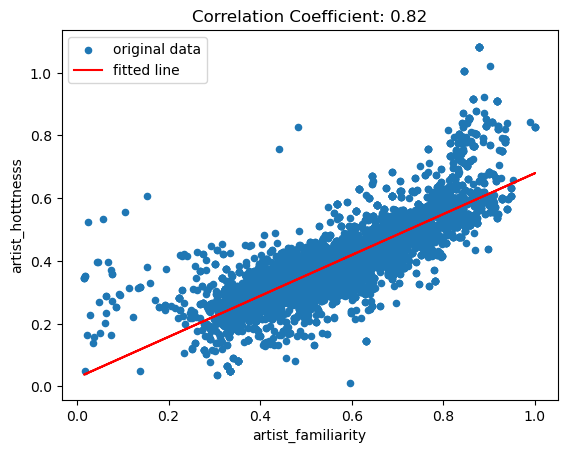

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# DO NOT CHANGE df_original TO AVOID TO REDO THIS DATAFRAME (TAKES TIME)

# Function needs 2 features like this: ("feature1", "feature2")
def scatter_plot(feature1, feature2):
    # Drop null values and 0 values
    df = df_original.dropna(subset=[feature1, feature2]) 
    df = df[(df[feature1] != 0) & (df[feature2] != 0)]

    # plot artist_familiarity against artist_hotttnesss
    # Define x and y variables
    x = df[feature1]
    y = df[feature2]

    # Create scatter plot
    df.plot(x=feature1, y=feature2, kind='scatter', label='original data')

    # Calculate the regression line
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # calculate correlation coefficient
    corr_coef = np.corrcoef(x, y)[0, 1]

    # add text to plot
    plt.title(f"Correlation Coefficient: {corr_coef:.2f}")

    # Add regression line
    plt.plot(x, slope*x + intercept, 'r', label='fitted line')

    # Add legend
    plt.legend()

    # show the plot
    plt.show()
    
scatter_plot('artist_familiarity', 'artist_hotttnesss')

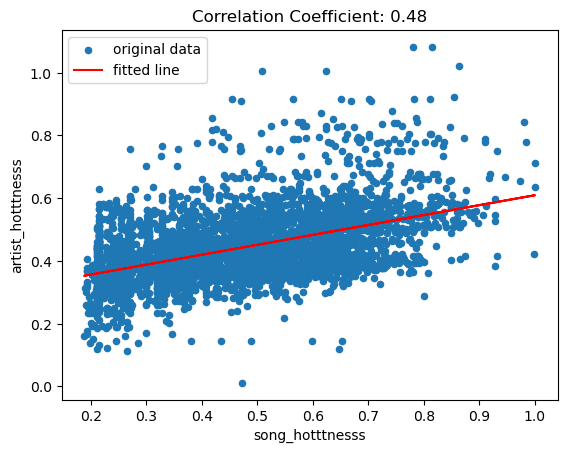

In [62]:
# Plot song_hotttnesss and artist_hotness
scatter_plot('song_hotttnesss', 'artist_hotttnesss')

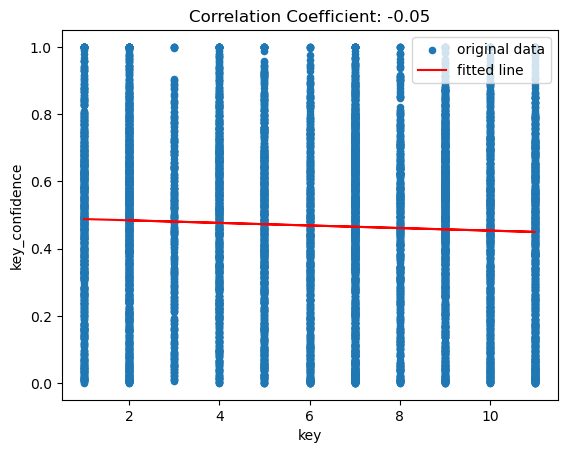

In [63]:
# Plot 'key', 'key_confidence'
scatter_plot('key', 'key_confidence')

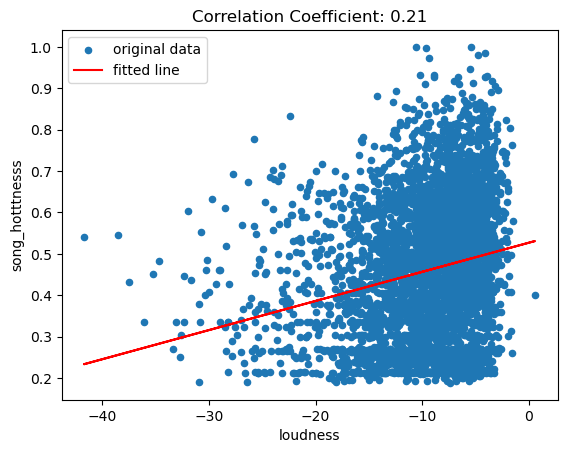

In [65]:
# Plot 'loudness' and song_hotness
scatter_plot('loudness', 'song_hotttnesss')

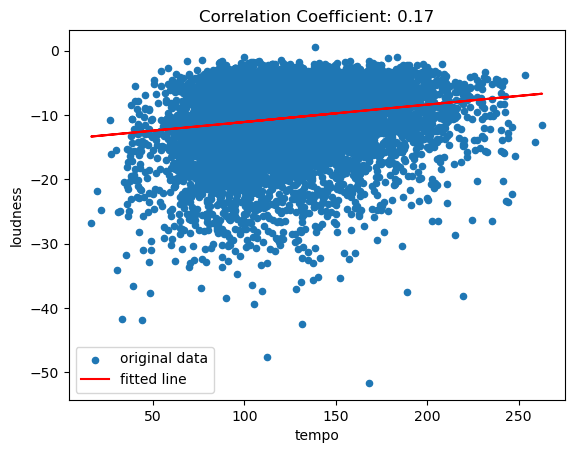

In [68]:
# Plot 'danceability' and 'loudness'
scatter_plot('tempo', 'loudness')

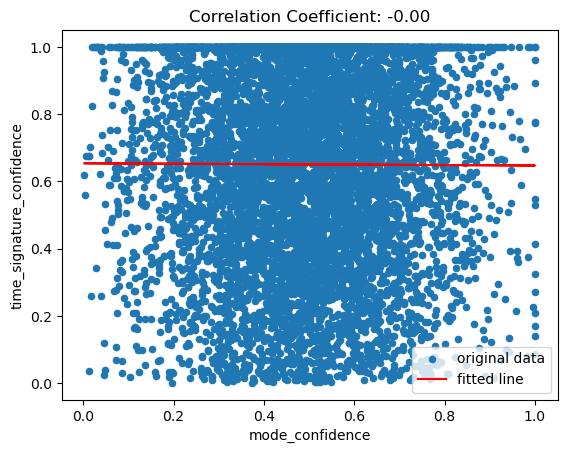

In [71]:
#Plot mode_confidence and time_signature_confidence
scatter_plot('mode_confidence', 'time_signature_confidence')

In [85]:
# Count values in danceablity after droping 0 values
danceability_count = df_original[(df_original['danceability'] != 0)]
print(danceability_count.count())

artist_familiarity           0
artist_hotttnesss            0
artist_location              0
artist_name                  0
genre                        0
song_hotttnesss              0
song_id                      0
title                        0
analysis_sample_rate         0
danceability                 0
duration                     0
end_of_fade_in               0
energy                       0
key                          0
key_confidence               0
loudness                     0
mode                         0
mode_confidence              0
start_of_fade_out            0
tempo                        0
time_signature               0
time_signature_confidence    0
track_id                     0
year                         0
dtype: int64


In [86]:
# Count values in energy after droping 0 values
energy_count = df_original[(df_original['energy'] != 0)]
print(energy_count.count())

artist_familiarity           0
artist_hotttnesss            0
artist_location              0
artist_name                  0
genre                        0
song_hotttnesss              0
song_id                      0
title                        0
analysis_sample_rate         0
danceability                 0
duration                     0
end_of_fade_in               0
energy                       0
key                          0
key_confidence               0
loudness                     0
mode                         0
mode_confidence              0
start_of_fade_out            0
tempo                        0
time_signature               0
time_signature_confidence    0
track_id                     0
year                         0
dtype: int64


In [102]:
# Group by genre
display(df_original.loc[:, ['energy','genre']])

,energy,genre
0,0.0,
1,0.0,
2,0.0,
3,0.0,
4,0.0,
...,...,...
9995,0.0,
9996,0.0,
9997,0.0,
9998,0.0,
